x	y
100 	 4.019999910146 	 9.26661563141658
101 	 4.05999990925193 	 5.11394471579422
102 	 4.09999990835786 	 1.99191112744788
103 	 4.13999990746379 	 0.534142026843062
104 	 4.17999990656972 	 0.106216178820138
105 	 4.21999990567565 	 0.01256128714201451
106 	 4.25999990478158 	 0.001826148685669022
107 	 4.29999990388751 	 0.0
108 	 4.33999990299344 	 0.0
109 	 4.37999990209937 	 0.0
110 	 4.4199999012053 	 0.0
111 	 4.45999990031123 	 0.0
112 	 4.49999989941716 	 0.0
113 	 4.53999989852309 	 0.0
114 	 4.57999989762902 	 0.0
115 	 4.61999989673495 	 0.0
116 	 4.65999989584088 	 0.0
117 	 4.69999989494681 	 0.0
118 	 4.73999989405274 	 0.0
119 	 4.77999989315867 	 0.0
The first minimum is at index 107 with x = 4.29999990388751 and y = 0.0


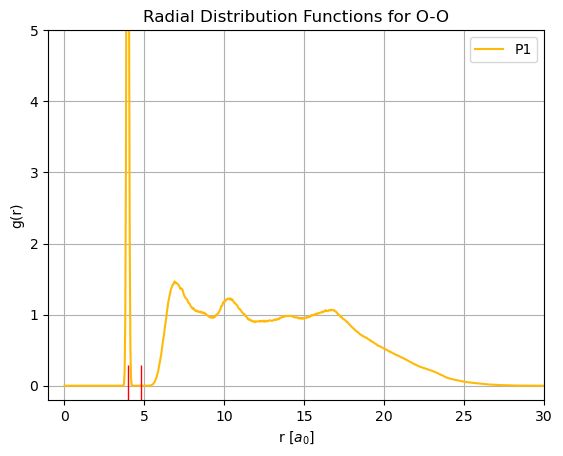

In [97]:
import os
import matplotlib.pyplot as plt

colours = ['#370617','#9d0208', '#dc2f02', '#e85d04', '#f48c06', '#ffba08']
colours.reverse()
#pairs = ['111','121', '131', '221', '231','331']

pair = '111'


pressures = [1]
parent_directory = 'D:/MSc/summer_project/'

directories = [os.path.join(parent_directory, 'p' + str(pressure)) for pressure in pressures]

all_x_values = []
all_y_values = []

for dir in directories:
    file_path = os.path.join(dir, 'rdf.out' + pair + '.txt')
    with open(file_path, 'r') as file:
        data = file.readlines()
        x_values = []
        y_values = []
        for line in data:
            x, y = map(float, line.split())
            x_values.append(x)
            y_values.append(y)
        
        all_x_values.append(x_values)
        all_y_values.append(y_values)
        

for i in range(len(pressures)):
    x_values = all_x_values[i]
    y_values = all_y_values[i]
    label = 'P' + str(pressures[i])
    colour = colours[i]
    plt.plot(x_values, y_values, label = label, color = colour)

plt.legend()
plt.xlim(-1,30)
plt.ylim(-0.2,5)
plt.xlabel('r [$a_0$]')
plt.ylabel('g(r)')
plt.grid(True)

title_label = ''
for character in pair[:-1]:
    if character == '1':
        title_label += 'O-'
    elif character == '2':
        title_label += 'C-'
    elif character == '3':
        title_label += 'Na-'
    else:
        print('Invalid character:', character)
        break
title_label = title_label[:-1]
plt.title('Radial Distribution Functions for ' + title_label)

#####

def pick_range(lower_index, upper_index, x_values, y_values):
    plt.plot(x_values[lower_index],0, marker = '|', color = 'red', markersize = 30)
    plt.plot(x_values[upper_index],0, marker = '|', color = 'red', markersize = 30)
    if upper_index - lower_index <= 50:
        print('x\ty')
        for index, values in enumerate(zip(x_values[lower_index:upper_index],y_values[lower_index:upper_index])):
            print(index+lower_index, '\t', values[0], '\t', values[1])
        lowest_value = min(y_values)
        for index, values in enumerate(zip(x_values[lower_index:upper_index],y_values[lower_index:upper_index])):
            if values[1] == lowest_value:
                print('The first minimum is at index ' + str(index+lower_index) + ' with x = ' + str(values[0]) + ' and y = ' + str(values[1]))
                break


lower_index = 100
upper_index = 120
pick_range(lower_index, upper_index, x_values, y_values, )